In [1]:
%matplotlib inline
import main
import spark_greedy
from pyspark import SparkContext
import matplotlib.pyplot as plt

In [2]:
sc = SparkContext("local", "100_run")

In [3]:
NC_digraph = main.import_graph("nc_mini.json")

In [4]:
trials = spark_greedy.greedy_trials(sc, 100, NC_digraph, 3, 100, 10, 8)

In [9]:
_lambda = min(trials["results"])/max(trials["results"])
print min(trials["results"])
print max(trials["results"])
print _lambda

42.98
51.16
0.840109460516


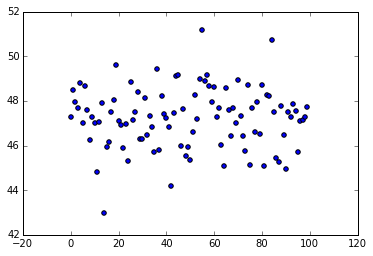

In [6]:
plt.scatter(range(0, len(trials["results"])),trials["results"])

([<matplotlib.patches.Wedge at 0x10b6f31d0>,
  <matplotlib.text.Text at 0x10b777f10>])

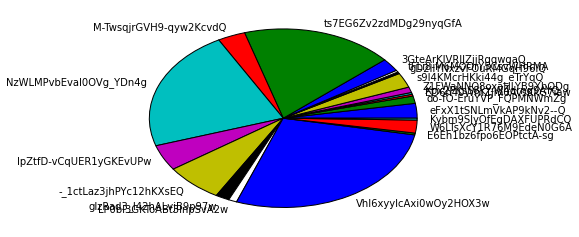

In [7]:
nodes_values = spark_greedy.node_count(trials)
plt.pie(nodes_values.values(), labels=nodes_values.keys())